Problem 1: EU Cities Temperatures Dataset (55 points)

Preprocessing/Analysis (28 pts)

Load Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load DataSet

In [11]:
df = pd.read_csv('EuCitiesTemperatures.csv')
df

city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no       NaN   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes       NaN   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08        15.18  
1         1.52          NaN  
2        11.41         4.54  
3          NaN         6.91  
4        14.29         6.79  
..         ...          ...  
208        NaN          NaN  
209      -3.53        10.14  
210      -4.23         8.00  
211      -4.25         8.60  
212      -3.95         9.73  

[213 rows x 8 columns]

1.[9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.

In [12]:
df["latitude"] = df["latitude"].fillna(df.groupby("country")["latitude"].transform('mean'))
df["latitude"] = df["latitude"].round(2)

df["longitude"] = df["longitude"].fillna(df.groupby("country")["longitude"].transform('mean'))
df["longitude"] = df["longitude"].round(2)

df

city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no     47.85   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes     53.55   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08        15.18  
1         1.52          NaN  
2        11.41         4.54  
3        14.02         6.91  
4        14.29         6.79  
..         ...          ...  
208      -2.94          NaN  
209      -3.53        10.14  
210      -4.23         8.00  
211      -4.25         8.60  
212      -3.95         9.73  

[213 rows x 8 columns]

2.[9 pts] Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)

In [13]:
cityFilter = df.loc[(df['latitude'] >= 40) & (df['latitude'] <= 60) & (df['longitude'] >= 15) & (df['longitude'] <= 30)]

countryFreq = cityFilter['country'].value_counts()

title = countryFreq.index.tolist()

max_value = max(countryFreq)

country = [index for index, value in enumerate(countryFreq) if value == max_value]

returnCountry = []

for item in country:
    returnCountry.append(title[item])

returnCountry

['Romania', 'Poland']

3.[10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).


In [14]:
df["temperature"] = (df["temperature"].fillna(df.groupby(["coastline", "EU"])["temperature"].transform("mean")))
df

city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no     47.85   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes     53.55   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08    15.180000  
1         1.52     7.481538  
2        11.41     4.540000  
3        14.02     6.910000  
4        14.29     6.790000  
..         ...          ...  
208      -2.94    10.314494  
209      -3.53    10.140000  
210      -4.23     8.000000  
211      -4.25     8.600000  
212      -3.95     9.730000  

[213 rows x 8 columns]

Visualization (27 pts)

1.[6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.

Text(0, 0.5, 'Number of Cities')

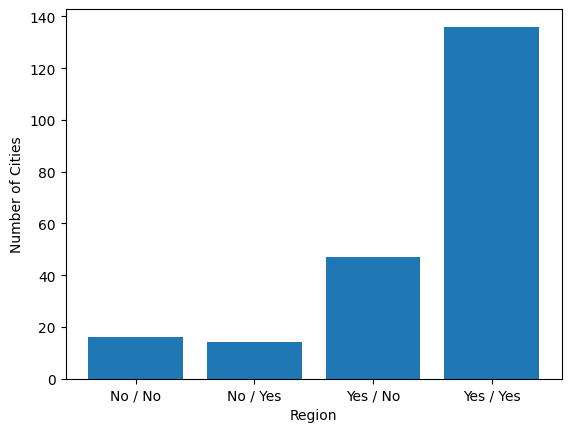

In [15]:
cityFreq = df.groupby(["coastline", "EU"])['city'].value_counts()
cityFreqList = cityFreq.index.tolist()

data = {}
for item in cityFreqList:
    
    key = item[0].capitalize()+' / '+item[1].capitalize()
    if key in data:
        data[key] += 1
    else:
       data[key] = 1

keys = data.keys()
value = data.values()

plt.bar(keys, value)
plt.xlabel("Region")
plt.ylabel("Number of Cities")

2.[7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.


Text(0, 0.5, 'Latitude')

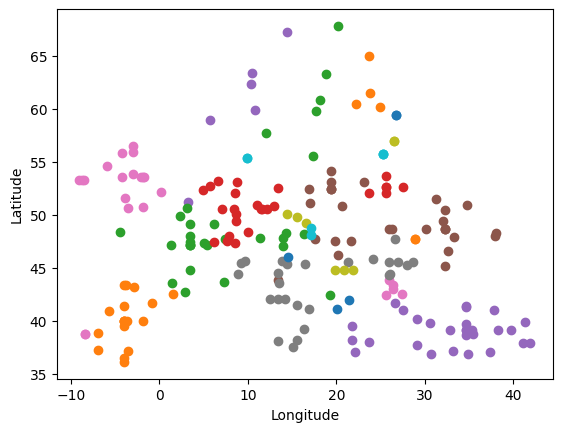

In [16]:
groups = df.groupby("country")
for name, group in groups:
    plt.plot(group["longitude"], group["latitude"], marker="o", linestyle="", label=name)

plt.xlabel("Longitude")
plt.ylabel("Latitude")

3.[6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).


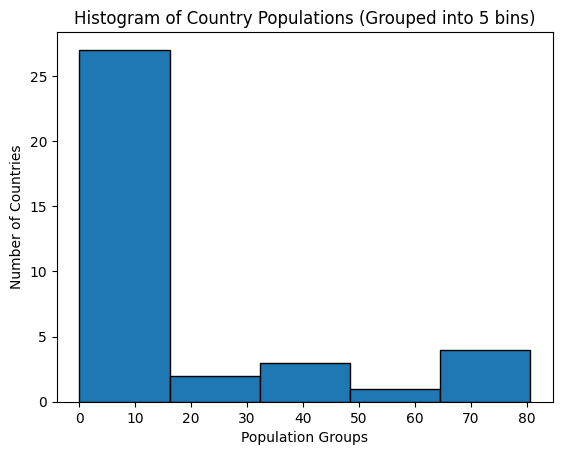

In [17]:
# Keep one population value per country (they're repeated across cities)
unique_populations = df.drop_duplicates(subset='country')['population']

# Plot histogram with 5 bins
num_bins = 5
plt.hist(unique_populations, bins=num_bins, edgecolor='black')
plt.xlabel('Population Groups')
plt.ylabel('Number of Countries')
plt.title('Histogram of Country Populations (Grouped into 5 bins)')
plt.show()


4.[8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.
Each subplot should be a scatter plot of Latitude (y-axis) vs. City (x-axis), where the color of the plot points should be based on the temperature values: ‘red’ for temperatures above 10, ‘blue’ for temperatures below 6 and ‘orange for temperatures between 6 and 10 (both inclusive). For each subplot, set xticks to an array of numbers from 0 to n-1 (both inclusive), where n is the total number of cities in each region type. This represents each city as a number between 0 and n-1.

In [ ]:
# Set color based on temperature
conditions = [
    (df['temperature'] > 10),
    (df['temperature'] < 6),
    (df['temperature'] >= 6) & (df['temperature'] <= 10)
]
colors = ['red', 'blue', 'orange']
df['color'] = np.select(conditions, colors, default='gray')

# Group by coastline and EU columns
grouped = df.groupby(['coastline', 'EU'])

# Region definitions and subplot positions
regions = [
    (('no', 'yes'), (0, 0), 'coastline = No, EU = Yes'),
    (('yes', 'yes'), (0, 1), 'coastline = Yes, EU = Yes'),
    (('yes', 'no'), (1, 0), 'coastline = Yes, EU = No'),
    (('no', 'no'), (1, 1), 'coastline = No, EU = No')
]

# Create 2x2 subplot figure
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plot each region
for key, idx, title in regions:
    ax = axs[idx]
    data = grouped.get_group(key)

    city_labels = data['city'].tolist()
    x = range(len(city_labels))
    y = data['latitude']
    color = data['color']

    ax.scatter(x, y, c=color)
    ax.set_title(title)
    ax.set_xlabel("Cities")
    ax.set_ylabel("Latitude")
    ax.set_xticks(x)
    ax.set_xticklabels(city_labels, rotation=90, fontsize=8)

# Optimize layout
plt.tight_layout()
plt.show()
